# TP on Adversarial Bandits

In [179]:
import numpy as np
import random
import matplotlib.pyplot as plt

### Question 1 - Intro

In [1343]:
# Game “Rock paper scissors”

M = 3
N = 3

# Loss matrix

L = np.array([[0,1,-1],[-1,0,1],[1,-1,0]])

In [1344]:
L

array([[ 0,  1, -1],
       [-1,  0,  1],
       [ 1, -1,  0]])

### Full information feedback

In this part, we assume that both players know the matrix L in advance and can compute L(i, j) for any (i, j).

### Question 2 - Implementation of EWA

In [1383]:
# Action by both player 0:rock, 1:paper, 2:scisors

act = np.array([0,1,2])

In [1384]:
def rand_exp (p):
    'input a probability vector p ∈ ∆M'
    'return X ∈ [M] with P(X = i) = pi'
    return(random.choices(act, p))

In [1385]:
def EWA_update(p_t,l_t,n):
    'input a vector pt ∈ ∆M and a loss vector `t ∈ [−1, 1]^M, n is the learning rate'
    'return the updated vector pt+1 ∈ ∆M'
    return(((p_t*np.exp(-n*l_t.T))/(np.sum(p_t*np.exp(-n*l_t.T))))[0])

### Question 3 - Simulation against a fixed adversary

In [1386]:
# Fixed adversary
q_t = np.array([0.5,0.25,0.25])

# Number of episodes
T = 100

# Learning rate
n=1

# initialisation
p_init = np.array([1/3,1/3,1/3])

In [1387]:
def instance(T,q_t,n,L):
    # init with random choice for p
    p_t = p_init

    # keep track of the evolution of the vect p
    p_evol=[]
    p_evol.append(p_init)

    # keep track of the loss Lij
    loss_evol = []

    # Simulate an instance
    for t in range (T):
        
        # chose our action from distribution p
        draw = rand_exp(p_t)
    
        # chose adversary action from distribution q
        adv_draw = rand_exp(q_t)
    
        # update vector p with previous vector p and the loss vector from adversary choice
        p_t = EWA_update(p_t,L[:,adv_draw],n)
    
        # vector p evolution
        p_evol.append(np.array(p_t))
    
        # loss Lij evolution
        loss_evol.append(L[draw, adv_draw])
    
    return(p_evol,loss_evol)
    

In [1395]:
# Simulation
p_evol, loss_evol = instance(T,q_t,n,L)

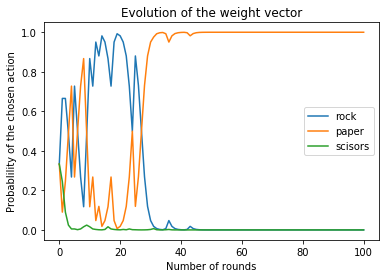

In [1396]:
plt.plot(p_evol)
plt.legend(('rock','paper','scisors'))
plt.title('Evolution of the weight vector')
plt.xlabel('Number of rounds')
plt.ylabel('Probablility of the chosen action')

plt.show()

Choosing paper seems logical since adversary chose:
- rock with q0=0.5 => +1
- paper with q1=0.25 => 0
- scisors with q2=0.25 => -1

In [1397]:
# Average loss as a function of t

def avg_loss_evo(loss_evo,T):
    avg_loss = []
    for t in range (T):
        avg_loss.append(np.mean(loss_evo[0:t+1]))
    return(avg_loss)
        

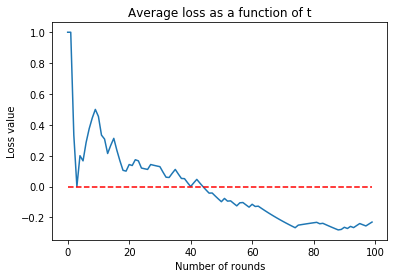

In [1398]:
plt.plot(avg_loss_evo(loss_evol,T))
plt.plot(np.zeros(T),'r--')
plt.title('Average loss as a function of t')
plt.xlabel('Number of rounds')
plt.ylabel('Loss value')

plt.show()

In [727]:
# Cumulative regret as a function of t

def cum_regret(loss_evol,T):
    cum_reg = []
    for t in range (T):
        cum_reg.append(np.sum(loss_evol[0:t+1] + np.ones(t+1)[0]))
    return(cum_reg)

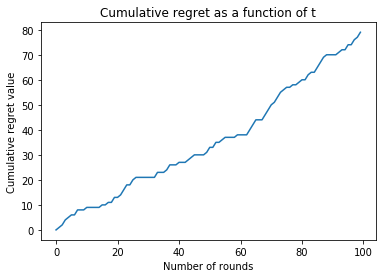

In [728]:
plt.plot(cum_regret(loss_evol,T))
plt.title('Cumulative regret as a function of t')
plt.xlabel('Number of rounds')
plt.ylabel('Cumulative regret value')

plt.show()

In [753]:
# Repeat the simulation n = 10 times to see if the algorithm is stable

loss_evol_sample = []

for i in range (10):
    loss_evol_sample.append(instance(T,p_t,q_t,n,L)[1])

avg_loss_sample = []

for i in range (10):
    avg_loss_sample.append(avg_loss_evo(loss_evol_sample[i],T))

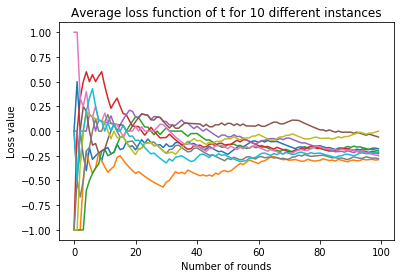

In [754]:
plt.title('Average loss function of t for 10 different instances')
plt.xlabel('Number of rounds')
plt.ylabel('Loss value')

for i in range (10):
    plt.plot(avg_loss_sample[i])

plt.show()

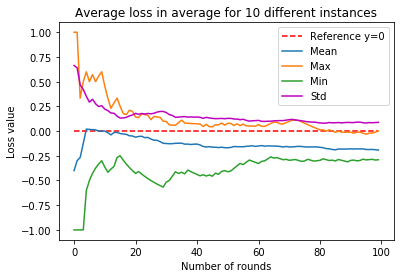

In [755]:

plt.title('Average loss in average for 10 different instances')
plt.xlabel('Number of rounds')
plt.ylabel('Loss value')

plt.plot(np.zeros(T),'r--')
plt.plot(np.mean( np.array( avg_loss_sample ), axis=0))
plt.plot(np.max( np.array( avg_loss_sample ), axis=0))
plt.plot(np.min( np.array( avg_loss_sample ), axis=0))
plt.plot(np.std( np.array( avg_loss_sample ), axis=0),'m')




plt.legend(('Reference y=0','Mean','Max','Min','Std'),loc='upper right')


plt.show()

Mean, Max and Min seem to be asymptotic and Std seems to get closer to zero, as a consequence, we can say the algorithm is stable.

In [1405]:
# Repeat the simulation for different learning rates and look at the cumulativ regret evolution
learning_rates = [0.01, 0.05, 0.1, 0.5, 1]

loss_evol_sample = []

for n in learning_rates:
    loss_evol_sample.append(instance(T,q_t,n,L)[1])
    
cum_regret_sample = []

for i in range (len(learning_rates)):
    cum_regret_sample.append(cum_regret(loss_evol_sample[i],T))
    
    

    

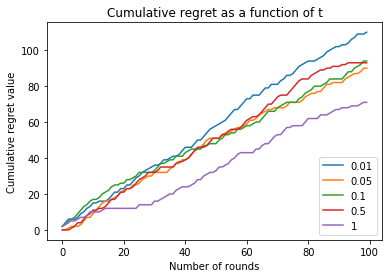

In [1406]:

plt.title('Cumulative regret as a function of t')
plt.xlabel('Number of rounds')
plt.ylabel('Cumulative regret value')
for i in range (len(learning_rates)):
    plt.plot(cum_regret_sample[i])


plt.legend(('0.01', '0.05', '0.1', '0.5', '1'),loc='lower right')

plt.show()

In practice, higher learning rate (1) is better than lower ones . In theory, convergence should take longer with small learning rates but should be better at the end.

So it's possible that the number of rounds (T=100) is not high enough to observe a better convergence with smaller learning rates. Smaller learning rates can also get stuck more easily on a local extremum.

### Question 4 - Simulation against an adaptive adversary

In [874]:
# Number of episodes
T = 100

# Learning rate
n_p = 1
n_q = 0.05

# initialisation
p_init = np.array([1/3,1/3,1/3])

q_init = np.array([1/3,1/3,1/3])

In [1407]:
def adaptative_instance(T,n_p,n_q,L):
    # init with random choice for p and q
    p_t = p_init
    q_t = q_init

    # keep track of the evolution of the vect p and q
    p_evol=[]
    p_evol.append(p_init)
    
    q_evol=[]
    q_evol.append(p_init)

    # keep track of the loss Lij
    loss_evol = []

    # Simulate an instance
    for t in range (T):
        
        # chose our action from distribution p
        draw = rand_exp(p_t)
    
        # chose adversary action from distribution q
        adv_draw = rand_exp(q_t)
    
        # update vector p and q with previous vector p and q and the loss vector from adversary choice
        p_t = EWA_update(p_t,L[:,adv_draw],n)
        q_t = EWA_update(q_t,L[:,draw],n)
    
        # vector p and q evolution
        p_evol.append(np.array(p_t))
        q_evol.append(np.array(q_t))
    
        # loss Lij evolution
        loss_evol.append(L[draw, adv_draw])
    
    return(p_evol,q_evol,loss_evol)
 

In [1412]:
# Simulation
p_evol_adv,q_evol_adv, loss_evol_adv = adaptative_instance(T,n_p,n_q,L)

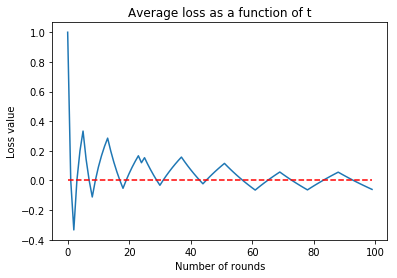

In [1413]:
# Plotting the loss as a function of t
plt.plot(avg_loss_evo(loss_evol_adv,T))
plt.plot(np.zeros(T),'r--')
plt.title('Average loss as a function of t')
plt.xlabel('Number of rounds')
plt.ylabel('Loss value')

plt.show()

In [1414]:
def p_t_bar(p_evol,T):
    p_t=[]
    for t in range(T):
        p_t.append(np.mean(np.array( p_evol[0:t+1]),axis=0))
    return(p_t)

In [1415]:
# We are looking at the distance (euclidian) between the vector p and the random choice

ref_random = p_init
p_t = p_t_bar(p_evol_adv,T)

dist = []

for i in range (T):
    dist.append(np.linalg.norm(p_t[i]-ref_random))

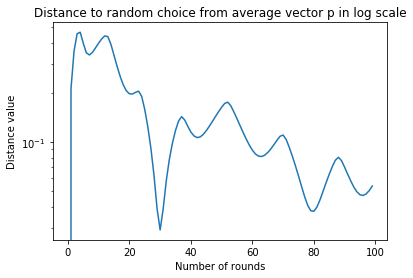

In [1416]:
plt.title('Distance to random choice from average vector p in log scale')
plt.xlabel('Number of rounds')
plt.ylabel('Distance value')
plt.yscale('log')

plt.plot(dist)
plt.show()

As expected, the Nash equilibrium for the game is to randomize our choice so it can't get precdicted. As a consequence, we get closer to the random choice for our vector p.

(at first, we move away from the random choice because we only have few samples to refer to)

### Bandit feedback

Now, we assume that the players do not know the game in advance but only observe the performance L(it
, jt)
(that we assume here to be in [0, 1]) of the actions played at time t. They need to learn the game and adapt to
the adversary as one goes along.

### Question 5 - Implementation of EXP3

In [1417]:
def estimated_loss(act_t,L_ij,p_t):
    ''' Imputs:
    -act_t: action at time t
    -L_ij: loss suffered by the player at time t
    -p_t: actions probabilities vector at time t
    
    Return:
    -vector of estimated loss'''
    vect = np.zeros(M)
    vect[act_t] = L_ij
    return((1/p_t[act_t])*vect)

In [1529]:
estimated_loss(1,-1,np.array([1/3,1/3,1/3]))

array([ 0., -3.,  0.])

In [887]:
def EXP3_update(act_t,L_ij,p_t):
    ''' Imputs:
    -act_t: action at time t
    -L_ij: loss suffered by the player at time t
    -p_t: actions probabilities vector at time t
    
    Return:
    -p_tp: actions probabilities vector at time t+1'''
    
    return(((p_t*np.exp(-n*estimated_loss(act_t,L_ij,p_t).T))/(np.sum(p_t*np.exp(-n*estimated_loss(act_t,L_ij,p_t).T)))))

In [1419]:
EXP3_update(1,-1,np.array([1/3,1/3,1/3]))

array([0.0452785, 0.909443 , 0.0452785])

### Question 6 - Repeat Question 3 for EXP3

In [1420]:
# Fixed adversary
q_t = np.array([0.5,0.25,0.25])

# Number of episodes
T = 100

# Learning rate
n=1

# initialisation
p_init = np.array([1/3,1/3,1/3])

In [1421]:
def EXP3_instance(T,q_t,n,L):
    # init with random choice for p
    p_t = p_init

    # keep track of the evolution of the vect p
    p_evol=[]
    p_evol.append(p_init)

    # keep track of the loss Lij
    loss_evol = []

    # Simulate an instance
    for t in range (T):
        
        # chose our action from distribution p
        draw = rand_exp(p_t)
    
        # chose adversary action from distribution q
        adv_draw = rand_exp(q_t)
    
        # update vector p with previous vector p and the loss vector from adversary choice
        p_t = EXP3_update(draw,L[draw, adv_draw],p_t)
    
        # vector p evolution
        p_evol.append(np.array(p_t))
    
        # loss Lij evolution
        loss_evol.append(L[draw, adv_draw])
    
    return(p_evol,loss_evol)

In [1435]:
# Simulation
p_evol, loss_evol = EXP3_instance(T,q_t,n,L)

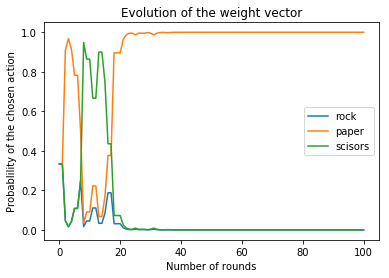

In [1436]:
plt.plot(p_evol)
plt.legend(('rock','paper','scisors'))
plt.title('Evolution of the weight vector')
plt.xlabel('Number of rounds')
plt.ylabel('Probablility of the chosen action')

plt.show()

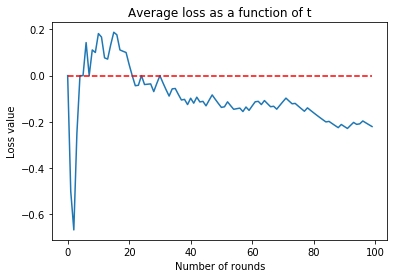

In [1437]:
plt.plot(avg_loss_evo(loss_evol,T))
plt.plot(np.zeros(T),'r--')
plt.title('Average loss as a function of t')
plt.xlabel('Number of rounds')
plt.ylabel('Loss value')

plt.show()

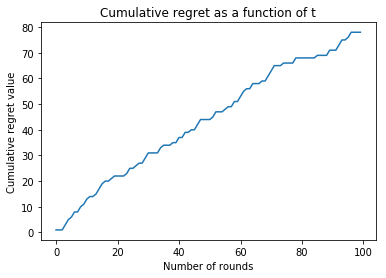

In [1438]:
plt.plot(cum_regret(loss_evol,T))
plt.title('Cumulative regret as a function of t')
plt.xlabel('Number of rounds')
plt.ylabel('Cumulative regret value')

plt.show()

In [1440]:
# Repeat the simulation n = 10 times to see if the algorithm is stable

loss_evol_sample = []

for i in range (10):
    loss_evol_sample.append(EXP3_instance(T,q_t,n,L)[1])

avg_loss_sample = []

for i in range (10):
    avg_loss_sample.append(avg_loss_evo(loss_evol_sample[i],T))

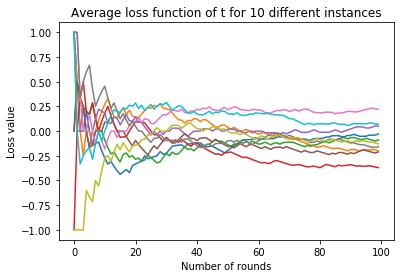

In [1441]:
plt.title('Average loss function of t for 10 different instances')
plt.xlabel('Number of rounds')
plt.ylabel('Loss value')

for i in range (10):
    plt.plot(avg_loss_sample[i])

plt.show()

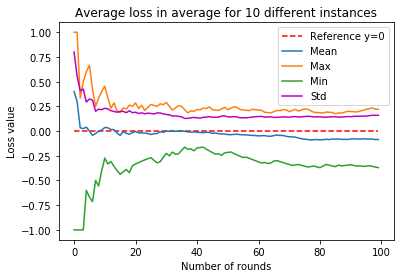

In [1442]:

plt.title('Average loss in average for 10 different instances')
plt.xlabel('Number of rounds')
plt.ylabel('Loss value')

plt.plot(np.zeros(T),'r--')
plt.plot(np.mean( np.array( avg_loss_sample ), axis=0))
plt.plot(np.max( np.array( avg_loss_sample ), axis=0))
plt.plot(np.min( np.array( avg_loss_sample ), axis=0))
plt.plot(np.std( np.array( avg_loss_sample ), axis=0),'m')




plt.legend(('Reference y=0','Mean','Max','Min','Std'),loc='upper right')


plt.show()

Seems a bit less stable than EWA (bigger std).

In [1445]:
# Repeat the simulation for different learning rates and look at the cumulativ regret evolution
learning_rates = [0.01, 0.05, 0.1, 0.5, 1]

loss_evol_sample = []

for n in learning_rates:
    loss_evol_sample.append(EXP3_instance(T,q_t,n,L)[1])
    
cum_regret_sample = []

for i in range (len(learning_rates)):
    cum_regret_sample.append(cum_regret(loss_evol_sample[i],T))

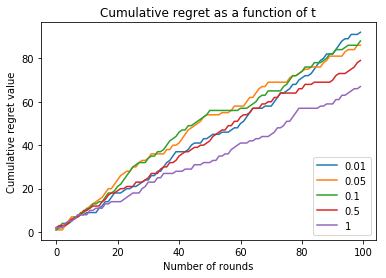

In [1446]:

plt.title('Cumulative regret as a function of t')
plt.xlabel('Number of rounds')
plt.ylabel('Cumulative regret value')
for i in range (len(learning_rates)):
    plt.plot(cum_regret_sample[i])


plt.legend(('0.01', '0.05', '0.1', '0.5', '1'),loc='lower right')

plt.show()

Same comment at the one we did before.

In [1447]:
# Number of episodes
T = 100

# Learning rate
n_p = 1
n_q = 0.05

# initialisation
p_init = np.array([1/3,1/3,1/3])

q_init = np.array([1/3,1/3,1/3])

In [1448]:
def EXP3_adaptative_instance(T,n_p,n_q,L):
    # init with random choice for p and q
    p_t = p_init
    q_t = q_init

    # keep track of the evolution of the vect p and q
    p_evol=[]
    p_evol.append(p_init)
    
    q_evol=[]
    q_evol.append(p_init)

    # keep track of the loss Lij
    loss_evol = []

    # Simulate an instance
    for t in range (T):
        
        # chose our action from distribution p
        draw = rand_exp(p_t)
    
        # chose adversary action from distribution q
        adv_draw = rand_exp(q_t)
    
        # update vector p and q with previous vector p and q and the loss vector from adversary choice
        p_t = EXP3_update(draw,L[draw, adv_draw],p_t)
        q_t = EXP3_update(adv_draw,L[adv_draw,draw],q_t)
    
        # vector p and q evolution
        p_evol.append(np.array(p_t))
        q_evol.append(np.array(q_t))
    
        # loss Lij evolution
        loss_evol.append(L[draw, adv_draw])
    
    return(p_evol,q_evol,loss_evol)
 

In [1474]:
# Simulation
p_evol_adv,q_evol_adv, loss_evol_adv = EXP3_adaptative_instance(T,n_p,n_q,L)

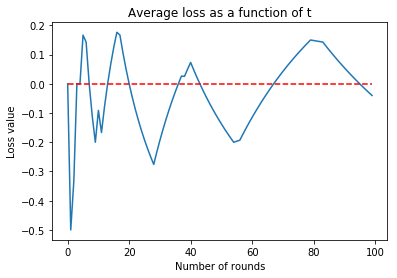

In [1475]:
# Plotting the loss as a function of t
plt.plot(avg_loss_evo(loss_evol_adv,T))
plt.plot(np.zeros(T),'r--')
plt.title('Average loss as a function of t')
plt.xlabel('Number of rounds')
plt.ylabel('Loss value')

plt.show()

In [1476]:
# We are looking at the distance (euclidian) between the vector p and the random choice

ref_random = p_init
p_t = p_t_bar(p_evol_adv,T)

dist = []

for i in range (T):
    dist.append(np.linalg.norm(p_t[i]-ref_random))

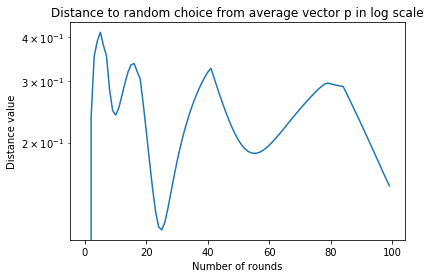

In [1477]:
plt.title('Distance to random choice from average vector p in log scale')
plt.xlabel('Number of rounds')
plt.ylabel('Distance value')
plt.yscale('log')

plt.plot(dist)
plt.show()

Same as before, we get closer to the Nash equilibrium [1/3,1/3,1/3] but here there is much more unstability.

### Bonus questions

### Question 8 - Use UCB for the adversary

In [1478]:
def ucb(nb_tries, cum_rewards, param):
    if param == None:
        c = 1. 
    else:
        c = float(param)
    if np.sum(np.where(nb_tries==0)[0])>0:
        index = np.where(nb_tries == 0)[0]
        return index[random.randrange(len(index))]
    else:
        k = np.shape(nb_tries)[0]
        t = np.sum(nb_tries)
        index = np.where(nb_tries > 0)[0]
        return index[np.argmax(cum_rewards[index] / nb_tries[index]+c*(np.log(t)/nb_tries[index])**0.5)]

In [1480]:
def EXP3_VS_UCB_adaptative_instance(T,n_p,L,param):
    # init with random choice for p and q
    p_t = p_init

    # keep track of the evolution of the vect p and q
    p_evol=[]
    p_evol.append(p_init)

    # keep track of the loss Lij
    loss_evol = []
    
    # number of tries of each action so far for q
    nb_tries = np.zeros(M)
    
    # cumulative reward of each action so far for q
    cum_rewards = np.zeros(M)

    # Simulate an instance
    for t in range (T):
        
        # chose our action from distribution p
        draw = rand_exp(p_t)
    
        # chose adversary action from UCB 
        adv_draw = ucb(nb_tries, cum_rewards, param)
        
        # update nb_tries and cum_rewards
        nb_tries[adv_draw] +=1
        cum_rewards[adv_draw] +=L[draw, adv_draw]
    
        # update vector p and q with previous vector p and the loss vector from adversary choice
        p_t = EXP3_update(draw,L[draw, adv_draw],p_t)
    
        # vector p and q evolution
        p_evol.append(np.array(p_t))
    
        # loss Lij evolution
        loss_evol.append(L[draw, adv_draw])
    
    return(p_evol,loss_evol,nb_tries,cum_rewards)
 

In [1488]:
# Simulation
p_evol_adv, loss_evol_adv,nb_tries,cum_rewards = EXP3_VS_UCB_adaptative_instance(T,n_p,L,param=0.9)

In [1489]:
# Take a look at the choices and their loss results
nb_tries,cum_rewards

(array([23., 29., 48.]), array([ 5.,  7., 17.]))

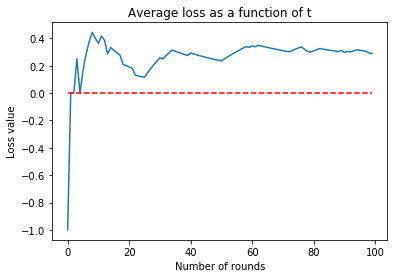

In [1490]:
# Plotting the loss as a function of t
plt.plot(avg_loss_evo(loss_evol_adv,T))
plt.plot(np.zeros(T),'r--')
plt.title('Average loss as a function of t')
plt.xlabel('Number of rounds')
plt.ylabel('Loss value')

plt.show()

### Q10 - Prisoner’s dilemna with EWA, EXP3 and EXP3 vs UCB

In [1530]:
L_prisoneer = np.array([[1,3],[0,2]])
p_init_pris = np.array([0.5,0.5])
q_init_pris = np.array([0.5,0.5])
act=np.array([0,1])
M=2

In [1503]:
# EWA adpatative advers.

def adaptative_instance(T,n_p,n_q,L):
    # init with random choice for p and q
    p_t = p_init_pris
    q_t = q_init_pris

    # keep track of the evolution of the vect p and q
    p_evol=[]
    p_evol.append(p_init_pris)
    
    q_evol=[]
    q_evol.append(p_init_pris)

    # keep track of the loss Lij
    loss_evol = []

    # Simulate an instance
    for t in range (T):
        
        # chose our action from distribution p
        draw = rand_exp(p_t)
    
        # chose adversary action from distribution q
        adv_draw = rand_exp(q_t)
    
        # update vector p and q with previous vector p and q and the loss vector from adversary choice
        p_t = EWA_update(p_t,L[:,adv_draw],n)
        q_t = EWA_update(q_t,L[:,draw],n)
    
        # vector p and q evolution
        p_evol.append(np.array(p_t))
        q_evol.append(np.array(q_t))
    
        # loss Lij evolution
        loss_evol.append(L[draw, adv_draw])
    
    return(p_evol,q_evol,loss_evol)
 

In [1510]:
#Simulation for EWA 
p_evol_adv,q_evol_adv, loss_evol_adv = adaptative_instance(T,n_p,n_q,L_prisoneer)

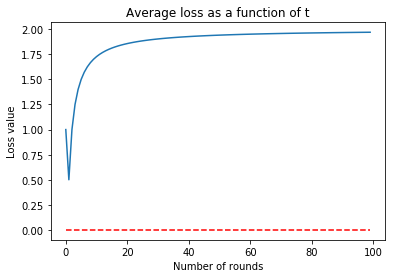

In [1505]:
# Plotting the loss as a function of t
plt.plot(avg_loss_evo(loss_evol_adv,T))
plt.plot(np.zeros(T),'r--')
plt.title('Average loss as a function of t')
plt.xlabel('Number of rounds')
plt.ylabel('Loss value')

plt.show()

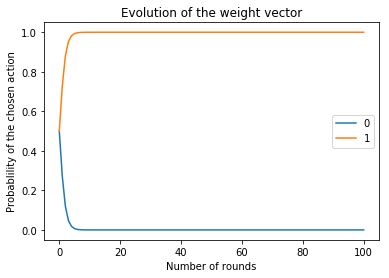

In [1506]:
plt.plot(p_evol_adv)
plt.legend(('0','1'))
plt.title('Evolution of the weight vector')
plt.xlabel('Number of rounds')
plt.ylabel('Probablility of the chosen action')

plt.show()

In [1531]:
def EXP3_adaptative_instance(T,n_p,n_q,L):
    # init with random choice for p and q
    p_t = p_init_pris
    q_t = q_init_pris

    # keep track of the evolution of the vect p and q
    p_evol=[]
    p_evol.append(p_init_pris)
    
    q_evol=[]
    q_evol.append(p_init_pris)

    # keep track of the loss Lij
    loss_evol = []

    # Simulate an instance
    for t in range (T):
        
        # chose our action from distribution p
        draw = rand_exp(p_t)
    
        # chose adversary action from distribution q
        adv_draw = rand_exp(q_t)
    
        # update vector p and q with previous vector p and q and the loss vector from adversary choice
        p_t = EXP3_update(draw,L[draw, adv_draw],p_t)
        q_t = EXP3_update(adv_draw,L[adv_draw,draw],q_t)
    
        # vector p and q evolution
        p_evol.append(np.array(p_t))
        q_evol.append(np.array(q_t))
    
        # loss Lij evolution
        loss_evol.append(L[draw, adv_draw])
    
    return(p_evol,q_evol,loss_evol)
 

In [1534]:
# SImulation
p_evol_adv,q_evol_adv, loss_evol_adv = EXP3_adaptative_instance(T,n_p,n_q,L_prisoneer)

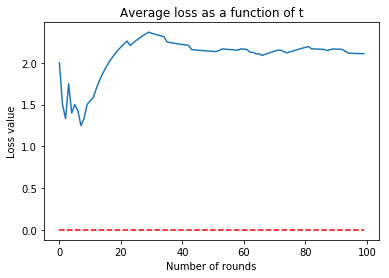

In [1535]:
# Plotting the loss as a function of t
plt.plot(avg_loss_evo(loss_evol_adv,T))
plt.plot(np.zeros(T),'r--')
plt.title('Average loss as a function of t')
plt.xlabel('Number of rounds')
plt.ylabel('Loss value')

plt.show()

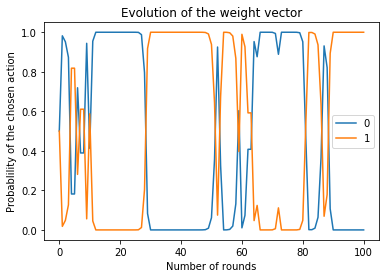

In [1536]:
plt.plot(p_evol_adv)
plt.legend(('0','1'))
plt.title('Evolution of the weight vector')
plt.xlabel('Number of rounds')
plt.ylabel('Probablility of the chosen action')

plt.show()

Here we can clearly observe the fact than EXP3 is less stable.

In [1539]:
def EXP3_VS_UCB_adaptative_instance(T,n_p,L,param):
    # init with random choice for p and q
    p_t = p_init_pris

    # keep track of the evolution of the vect p and q
    p_evol=[]
    p_evol.append(p_init_pris)

    # keep track of the loss Lij
    loss_evol = []
    
    # number of tries of each action so far for q
    nb_tries = np.zeros(M)
    
    # cumulative reward of each action so far for q
    cum_rewards = np.zeros(M)

    # Simulate an instance
    for t in range (T):
        
        # chose our action from distribution p
        draw = rand_exp(p_t)
    
        # chose adversary action from UCB 
        adv_draw = ucb(nb_tries, cum_rewards, param)
        
        # update nb_tries and cum_rewards
        nb_tries[adv_draw] +=1
        cum_rewards[adv_draw] +=L[draw, adv_draw]
    
        # update vector p and q with previous vector p and the loss vector from adversary choice
        p_t = EXP3_update(draw,L[draw, adv_draw],p_t)
    
        # vector p and q evolution
        p_evol.append(np.array(p_t))
    
        # loss Lij evolution
        loss_evol.append(L[draw, adv_draw])
    
    return(p_evol,loss_evol,nb_tries,cum_rewards)
 

In [1540]:
# Simulation
p_evol,loss_evol,nb_tries,cum_rewards = EXP3_VS_UCB_adaptative_instance(T,n_p,L_prisoneer,param=0.9)

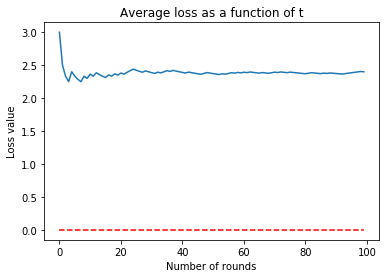

In [1541]:
# Plotting the loss as a function of t
plt.plot(avg_loss_evo(loss_evol,T))
plt.plot(np.zeros(T),'r--')
plt.title('Average loss as a function of t')
plt.xlabel('Number of rounds')
plt.ylabel('Loss value')

plt.show()

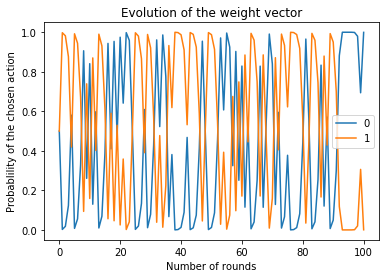

In [1542]:
plt.plot(p_evol)
plt.legend(('0','1'))
plt.title('Evolution of the weight vector')
plt.xlabel('Number of rounds')
plt.ylabel('Probablility of the chosen action')

plt.show()